In [7]:
pip install nba-api


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguestandings, leaguegamefinder

 Fetch the current NBA standings using the LeagueStandings class from the nba-api

In [3]:
def get_standings():
    standings_data = leaguestandings.LeagueStandings().get_data_frames()[0]
    return standings_data


In [4]:
standing_data = get_standings()
standing = standing_data[['TeamCity','TeamName','Conference','WinPCT','PlayoffRank']]
standing

,TeamCity,TeamName,Conference,WinPCT,PlayoffRank
0,Denver,Nuggets,West,0.662,1
1,Milwaukee,Bucks,East,0.714,1
2,Boston,Celtics,East,0.692,2
3,Memphis,Grizzlies,West,0.636,2
4,Sacramento,Kings,West,0.610,3
5,Philadelphia,76ers,East,0.662,3
6,Cleveland,Cavaliers,East,0.615,4
7,Phoenix,Suns,West,0.545,4
8,New York,Knicks,East,0.577,5
9,LA,Clippers,West,0.526,5


Graph show the win percentages of every teams

In [5]:
def plot_win_percentages(east_teams, west_teams):
    east_teams = east_teams[['TeamName', 'WinPCT']].sort_values('WinPCT', ascending=False)
    west_teams = west_teams[['TeamName', 'WinPCT']].sort_values('WinPCT', ascending=False)

    fig, ax = plt.subplots(2, 1, figsize=(12, 12))

    ax[0].bar(east_teams['TeamName'], east_teams['WinPCT'])
    ax[0].set_title('Eastern Conference Win Percentages')
    ax[0].set_ylabel('Win Percentage')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(west_teams['TeamName'], west_teams['WinPCT'])
    ax[1].set_title('Western Conference Win Percentages')
    ax[1].set_ylabel('Win Percentage')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


In [6]:
def get_top_teams(standing, num_teams=8):
    east_teams = standing[standing['Conference'] == 'East'].head(num_teams)
    west_teams = standing[standing['Conference'] == 'West'].head(num_teams)
    return east_teams, west_teams

In [7]:
get_top_teams(standing, num_teams=8)

(        TeamCity   TeamName Conference  WinPCT  PlayoffRank
 1      Milwaukee      Bucks       East   0.714            1
 2         Boston    Celtics       East   0.692            2
 5   Philadelphia      76ers       East   0.662            3
 6      Cleveland  Cavaliers       East   0.615            4
 8       New York     Knicks       East   0.577            5
 11      Brooklyn       Nets       East   0.545            6
 12         Miami       Heat       East   0.519            7
 14       Atlanta      Hawks       East   0.494            8,
         TeamCity   TeamName Conference  WinPCT  PlayoffRank
 0         Denver    Nuggets       West   0.662            1
 3        Memphis  Grizzlies       West   0.636            2
 4     Sacramento      Kings       West   0.610            3
 7        Phoenix       Suns       West   0.545            4
 9             LA   Clippers       West   0.526            5
 10  Golden State   Warriors       West   0.526            6
 13   Los Angeles     L

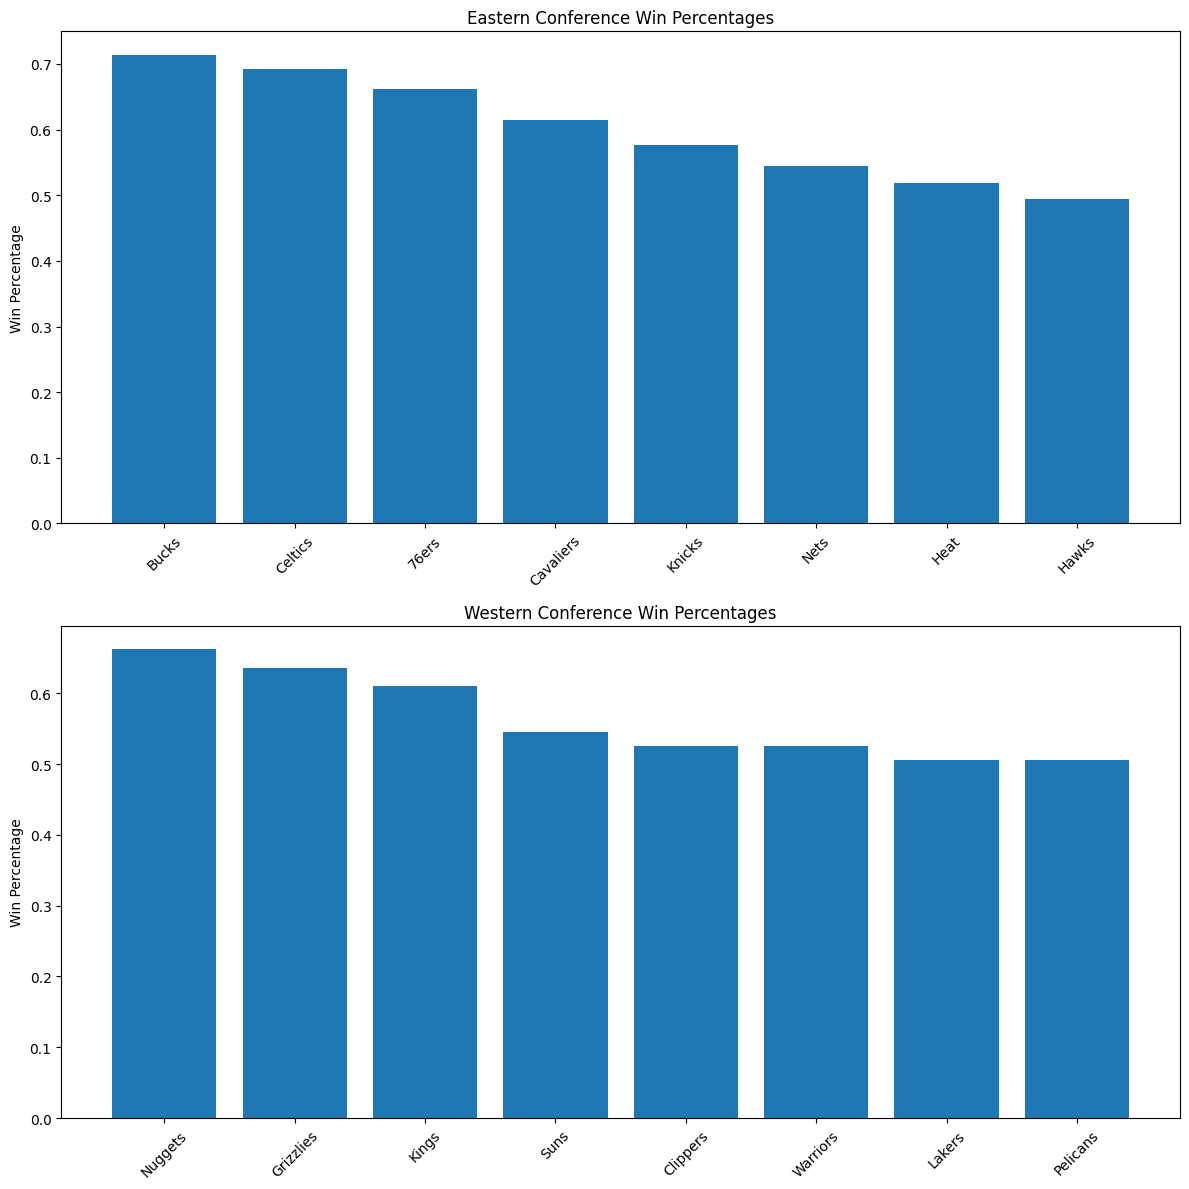

In [8]:
east_teams, west_teams = get_top_teams(standing)

plot_win_percentages(east_teams, west_teams)


Filter the top 8 teams of each conference bases on Win Percentage and Playoff Rank 

In [9]:
standing = standing_data[['TeamName','Conference','WinPCT']]
standing

,TeamName,Conference,WinPCT
0,Nuggets,West,0.662
1,Bucks,East,0.714
2,Celtics,East,0.692
3,Grizzlies,West,0.636
4,Kings,West,0.610
5,76ers,East,0.662
6,Cavaliers,East,0.615
7,Suns,West,0.545
8,Knicks,East,0.577
9,Clippers,West,0.526


In [10]:
def predict_final_champion(east_teams, west_teams):
    east_champion = east_teams.iloc[east_teams['WinPCT'].idxmax()]
    west_champion = west_teams.iloc[west_teams['WinPCT'].idxmax()]

    if east_champion['WinPCT'] < west_champion['WinPCT']:
        return west_champion['TeamName']
    else:
        return east_champion['TeamName']

In [11]:
east_champion = east_teams.iloc[east_teams['WinPCT'].idxmax()]
east_champion

TeamCity        Boston
TeamName       Celtics
Conference        East
WinPCT           0.692
PlayoffRank          2
Name: 2, dtype: object

In [12]:
west_champion = west_teams.iloc[west_teams['WinPCT'].idxmax()]
west_champion

TeamCity        Denver
TeamName       Nuggets
Conference        West
WinPCT           0.662
PlayoffRank          1
Name: 0, dtype: object

In [13]:
east_teams, west_teams = get_top_teams(standing)
predicted_champion = predict_final_champion(east_teams, west_teams)
print(f"The predicted NBA final champion is: {predicted_champion}")

The predicted NBA final champion is: Celtics
